## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [2]:
import pandas_datareader.data as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [7]:
from datetime import datetime

In [8]:
symbols = ['MSFT','AMZN','AAPL','GOOG','FB']
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 7, 1)
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [12]:
stock_data.head()

Attributes   Adj Close                                                   \
Symbols           MSFT         AMZN       AAPL         GOOG          FB   
Date                                                                      
2019-01-02   98.602066  1539.130005  38.562561  1045.849976  135.679993   
2019-01-03   94.974693  1500.280029  34.721451  1016.059998  131.740005   
2019-01-04   99.391899  1575.390015  36.203678  1070.709961  137.949997   
2019-01-07   99.518669  1629.510010  36.123104  1068.390015  138.050003   
2019-01-08  100.240234  1656.579956  36.811718  1076.280029  142.529999   

Attributes       Close                                                   ...  \
Symbols           MSFT         AMZN       AAPL         GOOG          FB  ...   
Date                                                                     ...   
2019-01-02  101.120003  1539.130005  39.480000  1045.849976  135.679993  ...   
2019-01-03   97.400002  1500.280029  35.547501  1016.059998  131.740005  ...   
2019-01-04  101.930000  1575.390015  37.064999  1070.709961  137.949997  ...   
2019-01-07  102.059998  1629.510010  36.982498  1068.390015  138.050003  ...   
2019-01-08  102.800003  1656.579956  37.687500  1076.280029  142.529999  ...   

Attributes        Open                                                   \
Symbols           MSFT         AMZN       AAPL         GOOG          FB   
Date                                                                      
2019-01-02   99.550003  1465.199951  38.722500  1016.570007  128.990005   
2019-01-03  100.099998  1520.010010  35.994999  1041.000000  134.690002   
2019-01-04   99.720001  1530.000000  36.132500  1032.589966  134.009995   
2019-01-07  101.639999  1602.310059  37.174999  1071.500000  137.559998   
2019-01-08  103.040001  1664.689941  37.389999  1076.109985  139.889999   

Attributes      Volume                                                 
Symbols           MSFT       AMZN         AAPL       GOOG          FB  
Date                                                                   
2019-01-02  35329300.0  7983100.0  148158800.0  1532600.0  28146200.0  
2019-01-03  42579100.0  6975600.0  365248800.0  1841100.0  22717900.0  
2019-01-04  44060600.0  9182600.0  234428400.0  2093900.0  29002100.0  
2019-01-07  35656100.0  7993200.0  219111200.0  1981900.0  20089300.0  
2019-01-08  31514400.0  8881400.0  164101200.0  1764900.0  26263800.0  

[5 rows x 30 columns]

In [28]:
stock_data.columns

MultiIndex([('Adj Close', 'MSFT'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'GOOG'),
            ('Adj Close',   'FB'),
            (    'Close', 'MSFT'),
            (    'Close', 'AMZN'),
            (    'Close', 'AAPL'),
            (    'Close', 'GOOG'),
            (    'Close',   'FB'),
            (     'High', 'MSFT'),
            (     'High', 'AMZN'),
            (     'High', 'AAPL'),
            (     'High', 'GOOG'),
            (     'High',   'FB'),
            (      'Low', 'MSFT'),
            (      'Low', 'AMZN'),
            (      'Low', 'AAPL'),
            (      'Low', 'GOOG'),
            (      'Low',   'FB'),
            (     'Open', 'MSFT'),
            (     'Open', 'AMZN'),
            (     'Open', 'AAPL'),
            (     'Open', 'GOOG'),
            (     'Open',   'FB'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'AAPL'),
            (   'Vol

In [22]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-02,98.602066,1539.130005,38.562561,1045.849976,135.679993
2019-01-03,94.974693,1500.280029,34.721451,1016.059998,131.740005
2019-01-04,99.391899,1575.390015,36.203678,1070.709961,137.949997
2019-01-07,99.518669,1629.510010,36.123104,1068.390015,138.050003
2019-01-08,100.240234,1656.579956,36.811718,1076.280029,142.529999
...,...,...,...,...,...
2019-06-25,131.146851,1878.270020,48.145855,1086.349976,188.839996
2019-06-26,131.638290,1897.829956,49.187206,1079.800049,187.660004
2019-06-27,131.854507,1904.280029,49.172436,1076.010010,189.500000


In [23]:
stock_data['Adj Close'].columns

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [24]:
#flatten pivot table to df
stock_data_df = pd.DataFrame(stock_data['Adj Close'].to_records())
stock_data_df.columns = [hdr.replace("('symbols', ", "date.").replace(")", "") \
                     for hdr in stock_data_df.columns]

In [25]:
stock_data_df

,Date,MSFT,AMZN,AAPL,GOOG,FB
0,2019-01-02,98.602066,1539.130005,38.562561,1045.849976,135.679993
1,2019-01-03,94.974693,1500.280029,34.721451,1016.059998,131.740005
2,2019-01-04,99.391899,1575.390015,36.203678,1070.709961,137.949997
3,2019-01-07,99.518669,1629.510010,36.123104,1068.390015,138.050003
4,2019-01-08,100.240234,1656.579956,36.811718,1076.280029,142.529999
...,...,...,...,...,...,...
120,2019-06-25,131.146851,1878.270020,48.145855,1086.349976,188.839996
121,2019-06-26,131.638290,1897.829956,49.187206,1079.800049,187.660004
122,2019-06-27,131.854507,1904.280029,49.172436,1076.010010,189.500000
123,2019-06-28,131.667801,1893.630005,48.724384,1080.910034,193.000000


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

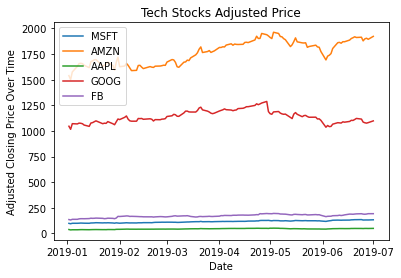

In [42]:
plt.plot(stock_data.index, stock_data["Adj Close"])
#ax = plt.subplot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Tech Stocks Adjusted Price")
plt.legend(symbols)
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

In [36]:
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
#expected_returns = returns_quarterly.mean()

In [38]:
returns_quarterly

Attributes Adj Close                                   Close            \
Symbols         AMZN      AAPL      GOOG        FB      MSFT      AMZN   
Date                                                                     
2019-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2019-01-03 -0.025242 -0.099607 -0.028484 -0.029039 -0.036788 -0.025242   
2019-01-04  0.050064  0.042689  0.053786  0.047138  0.046509  0.050064   
2019-01-07  0.034353 -0.002226 -0.002167  0.000725  0.001275  0.034353   
2019-01-08  0.016612  0.019063  0.007385  0.032452  0.007251  0.016612   
...              ...       ...       ...       ...       ...       ...   
2019-06-25 -0.018616 -0.015158 -0.026149 -0.019522 -0.031572 -0.018616   
2019-06-26  0.010414  0.021629 -0.006029 -0.006249  0.003747  0.010414   
2019-06-27  0.003399 -0.000300 -0.003510  0.009805  0.001643  0.003399   
2019-06-28 -0.005593 -0.009112  0.004554  0.018470 -0.001416 -0.005593   
2019-07-01  0.015082  0.018341  0.015764  0.000000  0.012840  0.015082   

Attributes                                    High  ...      Open            \
Symbols         AAPL      GOOG        FB      MSFT  ...      MSFT      AMZN   
Date                                                ...                       
2019-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2019-01-03 -0.099607 -0.028484 -0.029039 -0.015332  ...  0.005525  0.037408   
2019-01-04  0.042689  0.053786  0.047138  0.023156  ... -0.003796  0.006572   
2019-01-07 -0.002226 -0.002167  0.000725  0.007414  ...  0.019254  0.047261   
2019-01-08  0.019063  0.007385  0.032452  0.006778  ...  0.013774  0.038931   
...              ...       ...       ...       ...  ...       ...       ...   
2019-06-25 -0.015158 -0.026149 -0.019522 -0.005853  ...  0.001825 -0.000429   
2019-06-26  0.021629 -0.006029 -0.006249 -0.013446  ... -0.021129 -0.010126   
2019-06-27 -0.000300 -0.003510  0.009805 -0.007588  ... -0.001563  0.005030   
2019-06-28 -0.009112  0.004554  0.018470 -0.000817  ...  0.003206  0.003733   
2019-07-01  0.018341  0.015764  0.000000  0.015602  ...  0.015308  0.007270   

Attributes                                  Volume                      \
Symbols         AAPL      GOOG        FB      MSFT      AMZN      AAPL   
Date                                                                     
2019-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2019-01-03 -0.070437  0.024032  0.044189  0.205206 -0.126204  1.465252   
2019-01-04  0.003820 -0.008079 -0.005049  0.034794  0.316389 -0.358168   
2019-01-07  0.028852  0.037682  0.026491 -0.190749 -0.129528 -0.065338   
2019-01-08  0.005783  0.004302  0.016938 -0.116157  0.111119 -0.251060   
...              ...       ...       ...       ...       ...       ...   
2019-06-25 -0.000554 -0.006207  0.002391  0.615576  0.319448  0.156413   
2019-06-26 -0.003326 -0.023511 -0.017317 -0.290143 -0.189357  0.237168   
2019-06-27  0.012742 -0.002301  0.001794 -0.300122 -0.122937 -0.198247   
2019-06-28 -0.008038 -0.007020  0.003529  0.814465  0.418219  0.488567   
2019-07-01  0.022599  0.020076  0.024456 -0.245941  0.054619 -0.123996   

Attributes                      
Symbols         GOOG        FB  
Date                            
2019-01-02       NaN       NaN  
2019-01-03  0.201292 -0.192861  
2019-01-04  0.137309  0.276619  
2019-01-07 -0.053489 -0.307316  
2019-01-08 -0.109491  0.307353  
...              ...       ...  
2019-06-25  0.108412  0.080037  
2019-06-26  0.170664 -0.235321  
2019-06-27 -0.445414 -0.128788  
2019-06-28  0.685950  0.467775  
2019-07-01 -0.151725 -0.132744  

[125 rows x 29 columns]

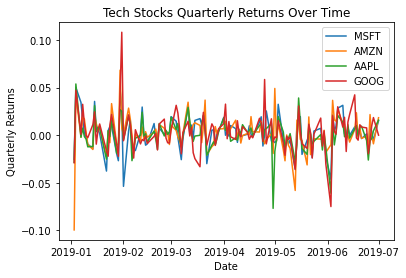

In [66]:
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"])
#ax = plt.subplot()
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("Tech Stocks Quarterly Returns Over Time")
plt.legend(symbols)
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

In [85]:
returns_quarterly["Adj Close"].columns

Index(['AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [112]:
returns_quarterly["Adj Close"]["AMZN"].index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 7],
           dtype='int64', name='Date', length=125)

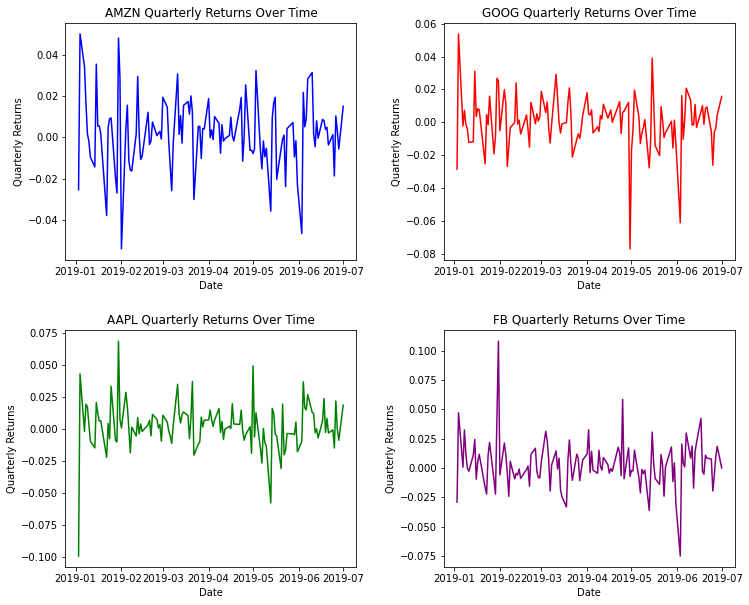

In [138]:
plt.figure(figsize=(12,10))
ax1=plt.subplot(2, 2, 1)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["AMZN"], color='blue')
#ax = plt.subplot()
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("AMZN Quarterly Returns Over Time")
ax2=plt.subplot(2, 2, 2)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["GOOG"], color='red')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("GOOG Quarterly Returns Over Time")
ax3=plt.subplot(2, 2, 3)
plt.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["AAPL"], color='green')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("AAPL Quarterly Returns Over Time")
ax4=plt.subplot(2, 2, 4)
ax4.plot(returns_quarterly.index, returns_quarterly["Adj Close"]["FB"], color='purple')
plt.xlabel("Date")
plt.ylabel("Quarterly Returns")
plt.title("FB Quarterly Returns Over Time")

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [175]:
expected_returns = returns_quarterly.mean()

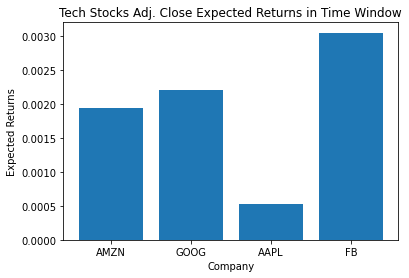

In [216]:
ax = plt.subplot()
plt.bar(range(len(expected_returns["Adj Close"])),expected_returns["Adj Close"]) 
ax.set_xticks(range(len(expected_returns["Adj Close"])))
ax.set_xticklabels(["AMZN","GOOG", "AAPL", "FB"])
plt.xlabel("Company")
plt.ylabel("Expected Returns")
plt.title("Tech Stocks Adj. Close Expected Returns in Time Window")
plt.show()

In [150]:
print("AMZN: ", expected_returns["Adj Close"]["AMZN"])
print("AAPL: ", expected_returns["Adj Close"]["AAPL"])
print("GOOG: ", expected_returns["Adj Close"]["GOOG"])
print("FB: ", expected_returns["Adj Close"]["FB"])



AMZN:  0.001933041498626496
AAPL:  0.00220800106631423
GOOG:  0.0005215519241295212
FB:  0.003045827604161545


Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [213]:
returns_var = returns_quarterly.var()

In [214]:
returns_var

Attributes  Symbols
Adj Close   AMZN       0.000280
            AAPL       0.000345
            GOOG       0.000258
            FB         0.000408
Close       MSFT       0.000191
            AMZN       0.000280
            AAPL       0.000346
            GOOG       0.000258
            FB         0.000408
High        MSFT       0.000120
            AMZN       0.000201
            AAPL       0.000280
            GOOG       0.000191
            FB         0.000418
Low         MSFT       0.000146
            AMZN       0.000269
            AAPL       0.000294
            GOOG       0.000217
            FB         0.000447
Open        MSFT       0.000134
            AMZN       0.000258
            AAPL       0.000255
            GOOG       0.000217
            FB         0.000468
Volume      MSFT       0.083203
            AMZN       0.092128
            AAPL       0.113013
            GOOG       0.161461
            FB         0.224434
dtype: float64

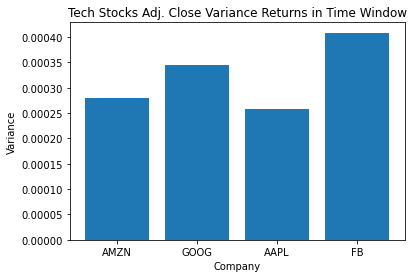

In [217]:
ax = plt.subplot()
plt.bar(range(len(returns_var["Adj Close"])),returns_var["Adj Close"]) 
ax.set_xticks(range(len(returns_var["Adj Close"])))
ax.set_xticklabels(["AMZN","GOOG", "AAPL", "FB"])
plt.xlabel("Company")
plt.ylabel("Variance")
plt.title("Tech Stocks Adj. Close Variance Returns in Time Window")
plt.show()

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [224]:
std_returns = returns_quarterly.std()

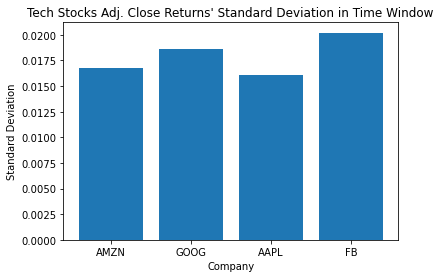

In [226]:
ax = plt.subplot()
plt.bar(range(len(std_returns["Adj Close"])),std_returns["Adj Close"]) 
ax.set_xticks(range(len(std_returns["Adj Close"])))
ax.set_xticklabels(["AMZN","GOOG", "AAPL", "FB"])
plt.xlabel("Company")
plt.ylabel("Standard Deviation")
plt.title("Tech Stocks Adj. Close Returns' Standard Deviation in Time Window")
plt.show()

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [228]:
cov_returns = returns_quarterly.cov()

In [231]:
cov_returns

Attributes         Adj Close                                   Close  \
Symbols                 AMZN      AAPL      GOOG        FB      MSFT   
Attributes Symbols                                                     
Adj Close  AMZN     0.000280  0.000190  0.000194  0.000194  0.000169   
           AAPL     0.000190  0.000345  0.000170  0.000165  0.000167   
           GOOG     0.000194  0.000170  0.000258  0.000206  0.000140   
           FB       0.000194  0.000165  0.000206  0.000408  0.000126   
Close      MSFT     0.000169  0.000167  0.000140  0.000126  0.000191   
           AMZN     0.000280  0.000190  0.000194  0.000194  0.000169   
           AAPL     0.000191  0.000346  0.000170  0.000165  0.000167   
           GOOG     0.000194  0.000170  0.000258  0.000206  0.000140   
           FB       0.000194  0.000165  0.000206  0.000408  0.000126   
High       MSFT     0.000098  0.000096  0.000080  0.000081  0.000117   
           AMZN     0.000186  0.000130  0.000133  0.000141  0.000092   
           AAPL     0.000134  0.000267  0.000118  0.000126  0.000109   
           GOOG     0.000124  0.000103  0.000181  0.000145  0.000074   
           FB       0.000117  0.000077  0.000116  0.000317  0.000054   
Low        MSFT     0.000122  0.000103  0.000098  0.000097  0.000127   
           AMZN     0.000205  0.000111  0.000149  0.000163  0.000107   
           AAPL     0.000146  0.000266  0.000129  0.000144  0.000114   
           GOOG     0.000142  0.000109  0.000182  0.000151  0.000092   
           FB       0.000165  0.000093  0.000158  0.000348  0.000088   
Open       MSFT     0.000047  0.000033  0.000034  0.000036  0.000046   
           AMZN     0.000117  0.000051  0.000074  0.000103  0.000036   
           AAPL     0.000105  0.000187  0.000074  0.000093  0.000080   
           GOOG     0.000073  0.000043  0.000102  0.000083  0.000029   
           FB       0.000066  0.000016  0.000054  0.000217  0.000022   
Volume     MSFT    -0.000384 -0.000331 -0.000431 -0.000501 -0.000006   
           AMZN     0.000212  0.000038  0.000231  0.000167 -0.000114   
           AAPL    -0.000820 -0.001398 -0.001214 -0.001363 -0.000676   
           GOOG    -0.000810 -0.000978 -0.001374 -0.001342 -0.000395   
           FB      -0.000172  0.000293 -0.000569  0.000572 -0.000230   

Attributes                                                      High  ...  \
Symbols                 AMZN      AAPL      GOOG        FB      MSFT  ...   
Attributes Symbols                                                    ...   
Adj Close  AMZN     0.000280  0.000191  0.000194  0.000194  0.000098  ...   
           AAPL     0.000190  0.000346  0.000170  0.000165  0.000096  ...   
           GOOG     0.000194  0.000170  0.000258  0.000206  0.000080  ...   
           FB       0.000194  0.000165  0.000206  0.000408  0.000081  ...   
Close      MSFT     0.000169  0.000167  0.000140  0.000126  0.000117  ...   
           AMZN     0.000280  0.000191  0.000194  0.000194  0.000098  ...   
           AAPL     0.000191  0.000346  0.000170  0.000165  0.000096  ...   
           GOOG     0.000194  0.000170  0.000258  0.000206  0.000080  ...   
           FB       0.000194  0.000165  0.000206  0.000408  0.000081  ...   
High       MSFT     0.000098  0.000096  0.000080  0.000081  0.000120  ...   
           AMZN     0.000186  0.000131  0.000133  0.000141  0.000089  ...   
           AAPL     0.000134  0.000268  0.000118  0.000126  0.000092  ...   
           GOOG     0.000124  0.000103  0.000181  0.000145  0.000074  ...   
           FB       0.000117  0.000078  0.000116  0.000317  0.000072  ...   
Low        MSFT     0.000122  0.000103  0.000098  0.000097  0.000100  ...   
           AMZN     0.000205  0.000112  0.000149  0.000163  0.000088  ...   
           AAPL     0.000146  0.000267  0.000129  0.000144  0.000083  ...   
           GOOG     0.000142  0.000109  0.000182  0.000151  0.000071  ...   
           FB       0.000165  0.000093  0.000158  0.000348  0.000084  ...   
O

None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.